# Solving TSP for benchmarking 

In [21]:
# Lazy importing 
import sys 
sys.path.append('..')

In [22]:
from travelingsalesperson import TSP 
from amplify import solve

from set_problem import sparse_distance_matrix
# lazy injection

n = 8

# setting up the TSP problem 
tsp = TSP(n)
tsp.distance_matrix = sparse_distance_matrix(n,10, 1)

qp = tsp.qubo(format="amplify", penalty=0)
model = qp["model"]
print(tsp.distance_matrix)

[[0. 5. 0. 0. 0. 0. 0. 0.]
 [5. 0. 8. 0. 0. 0. 0. 0.]
 [0. 8. 0. 7. 0. 0. 0. 0.]
 [0. 0. 7. 0. 9. 0. 0. 0.]
 [0. 0. 0. 9. 0. 6. 0. 0.]
 [0. 0. 0. 0. 6. 0. 7. 0.]
 [0. 0. 0. 0. 0. 7. 0. 6.]
 [0. 0. 0. 0. 0. 0. 6. 0.]]


## Brute Force

Total time taken in :  brute_force 0.08019375801086426
Tour:  (0, 3, 4, 2, 5, 1, 7, 6) Cost:  23


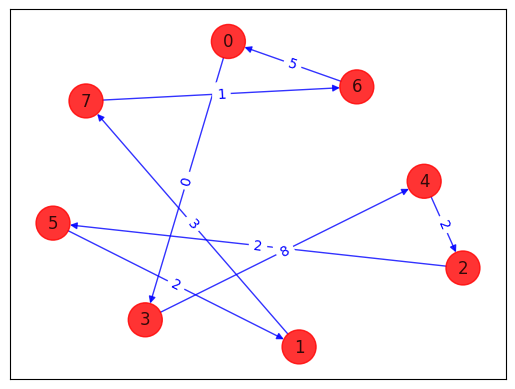

In [12]:
try:
    (tour, cost), dur = tsp.brute_force()
    tsp.draw_tour(tour)

    print("Tour: ", tour, "Cost: ", cost)
except KeyboardInterrupt as e:
    print(e)
    cost = "NaN"
    dur = "NaN"
    tour = "NaN"

from utils import add_data
add_data(n, cost, dur, tour, "brute_force")

## Fixstars Amplify AE

In [13]:
# Initialise Fixstars Client
from Utils.solvers import GetFixstarClient

clientFS = GetFixstarClient()

# Solve set partitioning and view result
resultF = solve(model, clientFS)

tsp.interpret(resultF, solver="Fixstar", verbose=True)

Cost: 23.0
Optimal tour: [3. 0. 6. 7. 1. 5. 2. 4.]
Execution time: 0:00:00.911177


## Gurobi

In [23]:
from Utils.solvers import GetGurobiClient

clientG = GetGurobiClient(r"D:\miniconda3\envs\cwq\gurobi110.dll")
resultG = solve(model, clientG)

tourG = tsp.interpret(resultG, solver="Gurobi", verbose=True)

Cost: 0.0
Optimal tour: [2. 4. 0. 6. 3. 1. 7. 5.]
Execution time: 0:00:00.009999


## D-Wave

In [ ]:
from Utils.solvers import GetDWaveClient

clientDWave = GetDWaveClient()
clientDWave.parameters.num_reads = 3000
result = solve(model, clientDWave)
try:
    tourD = tsp.interpret(result, solver="D-Wave", verbose=True)
except RuntimeError as e:
    print(e)
    add_data(n, "NaN", "NaN", "NaN", "D-Wave")

result has no feasible solution
